<a href="https://colab.research.google.com/github/skymined/study_data_analytics/blob/main/docs/quests/EDAs/EDA_ShoppingMallDeliveryWithDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙의 경우 설치 후 runtime  > restart 해야함

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
df_shop = pd.read_csv('ShoppingMallDeliveryWithDate.csv')

## 연속형 하나를 범주형으로 전환(선 진행 다음 필수)

In [3]:
df_shop['상품구매금액'].describe()

count    4.674900e+04
mean     6.936814e+04
std      6.611247e+04
min      0.000000e+00
25%      3.288000e+04
50%      6.778000e+04
75%      9.213000e+04
max      4.963400e+06
Name: 상품구매금액, dtype: float64

In [4]:
bins = [0,1000000, 2000000, 3000000, 4000000, 5000000]
labels = ['~1000000', '~2000000', '~3000000', '~4000000', '~5000000']
df_shop['상품구매금액_category'] = pd.cut(x=df_shop['상품구매금액'], bins = bins, labels =labels )
df_shop['상품구매금액_category'].value_counts()

~1000000    37591
~2000000        9
~5000000        1
~3000000        0
~4000000        0
Name: 상품구매금액_category, dtype: int64

<Axes: xlabel='상품구매금액_category', ylabel='count'>

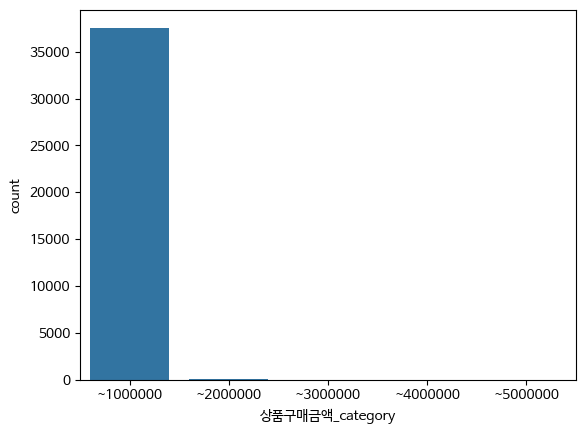

In [5]:
import seaborn as sns
sns.countplot(data=df_shop, x='상품구매금액_category')

## 제안 8: 주문량 변동성 분석 및 예측
- 문제 정의: 주문량의 시간별, 일별, 월별 변동성을 분석하고, 미래의 주문량을 예측합니다.
- 배경: 주문량의 변동성을 이해하고 예측함으로써, 인력 및 자원 배치를 최적화하고 재고 관리 효율성을 향상시킬 수 있습니다.


In [6]:
df_shop.columns

Index(['결제수단', '배송번호', '배송시작일', '배송완료일', '상품구매금액', '상품번호', '수량', '주문경로', '주문일',
       '상품구매금액_category'],
      dtype='object')

In [8]:
df_shop['주문일']

0        20181227
1        20181229
2        20181230
3        20181231
4        20181231
           ...   
46744    20171229
46745    20171229
46746    20171230
46747    20171231
46748    20171231
Name: 주문일, Length: 46749, dtype: int64

In [9]:
df_shop['주문일_month'] = df_shop['주문일'].astype(str).str[4:6]
df_shop['주문일_day'] = df_shop['주문일'].astype(str).str[6:8]
df_shop['주문일_month'].value_counts()

05    5838
04    5355
03    4517
12    4372
11    4263
01    4205
10    3871
02    3547
08    3234
07    2858
09    2516
06    2173
Name: 주문일_month, dtype: int64

In [10]:
df_shop[['배송번호', '주문일', '주문일_month', '주문일_day']]

,배송번호,주문일,주문일_month,주문일_day
0,D-20181227-0000648-00,20181227,12,27
1,D-20181229-0000119-00,20181229,12,29
2,D-20181230-0000100-00,20181230,12,30
3,D-20181231-0000087-00,20181231,12,31
4,D-20181231-0000108-00,20181231,12,31
...,...,...,...,...
46744,D-20171229-0000036-00,20171229,12,29
46745,D-20171229-0000043-00,20171229,12,29
46746,D-20171230-0000022-01,20171230,12,30
46747,D-20171231-0000017-01,20171231,12,31


<Axes: xlabel='주문일_month', ylabel='count'>

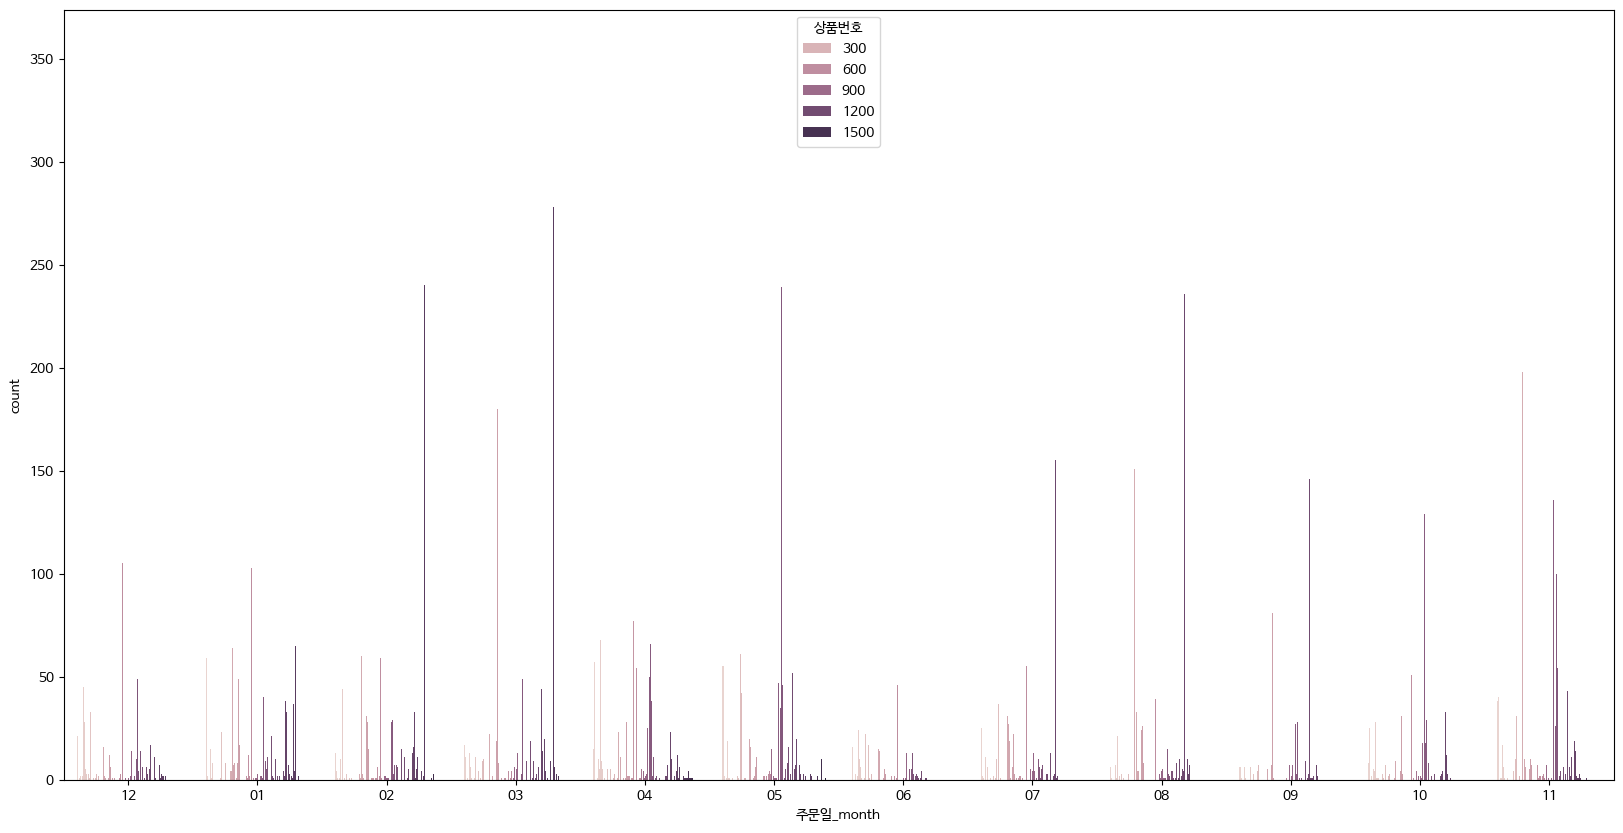

In [13]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.countplot(data=df_shop, x='주문일_month', hue='상품번호')
# 대체적으로 6월부터 꾸준히 주문일이 늘고 5월에 가장 많은 주문이 들어옴
# 5월에서 6월로 가는 사이에 주문량이 뚝 떨어짐

2월과 8월에 1200-1400번대 상품이 제일 많이 팔리는 것으로 보임
3월과 5월에 300-600번대 상품이 제일 많이 팔리는 것으로 보임
다른 달에 비해 1, 4, 6, 12월에는 특별히 많이 팔리는 상품이 없음

-> 특별히 팔리는 상품이 없는 날는 할인제도를 도입하는 등의 전략을 세울 수 있음
-> 특정 제품이 잘 팔리는 달에는 해당 제품에 잘 팔리지 않는 제품을 덤으로 끼워넣는 등의 전략을 쓸 수 있음
-> 특정 제품이 잘 팔리는 달에는 재고를 준비하자!

#### 상품번호를 라벨링 해보자
- 이것은 뇌피셜

In [18]:
df_shop['상품번호'].describe()

count    46661.000000
mean       763.193073
std        456.323734
min         38.000000
25%        378.000000
50%        928.000000
75%       1209.000000
max       1681.000000
Name: 상품번호, dtype: float64

In [27]:
product_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700]
product_labels= ['0번', '100', '200', '300', '400', '500', '600','700'
      , '800', '900', '1000', '1100', '1200', '1300', '1400', '1500', '1600' ]
df_shop['상품라벨링'] = pd.cut(x=df_shop['상품번호'], bins = product_bins, labels=product_labels)
df_shop['상품라벨링']

0        1000
1          0번
2        1200
3        1000
4        1100
         ... 
46744     400
46745     100
46746     100
46747     100
46748     400
Name: 상품라벨링, Length: 46749, dtype: category
Categories (17, object): ['0번' < '100' < '200' < '300' ... '1300' < '1400' < '1500' < '1600']

<Axes: xlabel='상품라벨링', ylabel='count'>

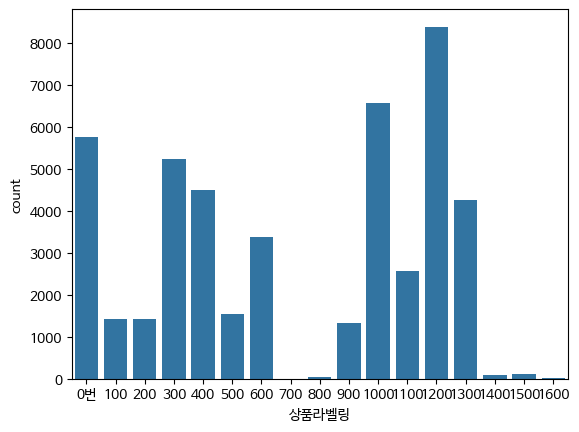

In [28]:
sns.countplot(data=df_shop, x='상품라벨링')